In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import string
from tqdm import tqdm

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report


In [3]:
# load dataset
df = pd.read_csv('./data/chargebacks_sampledata.csv')

print('Shape of dataset is: ', df.shape)

Shape of dataset is:  (5050, 30)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5050 non-null   float64
 1   V2      5050 non-null   float64
 2   V3      5050 non-null   float64
 3   V4      5050 non-null   float64
 4   V5      5050 non-null   float64
 5   V6      5050 non-null   float64
 6   V7      5050 non-null   float64
 7   V8      5050 non-null   float64
 8   V9      5050 non-null   float64
 9   V10     5050 non-null   float64
 10  V11     5050 non-null   float64
 11  V12     5050 non-null   float64
 12  V13     5050 non-null   float64
 13  V14     5050 non-null   float64
 14  V15     5050 non-null   float64
 15  V16     5050 non-null   float64
 16  V17     5050 non-null   float64
 17  V18     5050 non-null   float64
 18  V19     5050 non-null   float64
 19  V20     5050 non-null   float64
 20  V21     5050 non-null   float64
 21  V22     5050 non-null   float64
 22  

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,0.215113,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,-0.483771,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,-0.801748,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,0.022707,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


## Functions

In [6]:
def preprocess(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Process the raw dataset into to sets, predictors and target
    :param df: raw dataframe
    :return:
    X: predictors / features
    y: outcome / target
    """

    y = df['Class'].values
    X = df.drop(['Class'], axis = 1)

    return X, y

def plot_data(df: pd.DataFrame, ind_var: list):
    """
    Plot a scatter plot of data (two variables) and target
    :param df: raw dataframe
    :param ind_var: list with index of variables from matrix X
    :return: A scatter plot
    """

    if len(ind_var) != 2:
        raise ValueError("Error, ind_var must be dimension 2")
    elif not all(item in list(df.columns) for item in ind_var):
        raise ValueError(f"Error, some columns in {ind_var} do not belong to columns of dataframe")
    else:
        plt.scatter(df[str(ind_var[0])][df.Class == 0], df[str(ind_var[1])][df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
        plt.scatter(df[str(ind_var[0])][df.Class == 1], df[str(ind_var[1])][df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
        plt.legend()
        return plt.show()

### Class Imbalance Problem

In [7]:
# Fraud cases ratio
print(f"Ratio of fraudulent cases:  {df['Class'].mean():0.2f}% ")

Ratio of fraudulent cases:  0.01% 


In [8]:
# split raw data in features and target
X, y = preprocess(df)

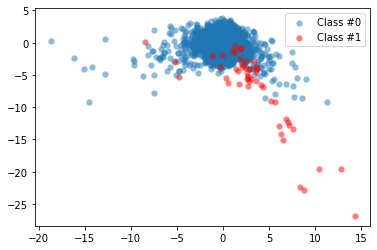

In [9]:
# create a scatter plot of data and target
cols = ['V2', 'V3']
plot_data(df, cols)

In [10]:
# Resampling method

method = SMOTE()
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

In [11]:
pd.value_counts(pd.Series(y))

0    5000
1      50
dtype: int64

In [12]:
pd.value_counts(pd.Series(y_resampled))

0    5000
1    5000
dtype: int64

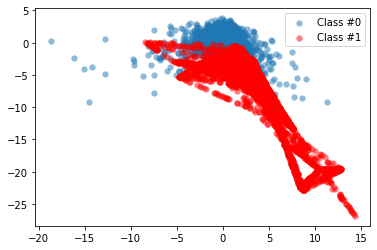

In [13]:
df_resampled = pd.DataFrame(pd.np.column_stack([X_resampled, y_resampled]), columns=df.columns)
# Plot the resampled data
plot_data(df_resampled, cols)

## ML Model

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
xgb.set_config(verbosity=0)

In [15]:
#functions
def report(y_true, y_pred):
    """
    Classification report based on scikit-learn
    :param y_true: ground truth
    :param y_pred: prediction
    :return: Classication Report
    """
    target_names = ['No Fraud','Fraud'] # you can change this passing it as parameter of the function ;)
    return print(classification_report(y_true, y_pred, target_names=target_names))

def print_ml_score(y_test, y_pred, clf):
    print('Classifier: ', clf.__class__.__name__)
    report(y_test, y_pred)
    print("---------------------------------------------------------")


def train_model(classifier, feature_vector_train, label_train, feature_vector_test, label_test, resampling = False):

    if resampling:
        method = BorderlineSMOTE()
        pipeline = Pipeline([('SMOTE', method), (str(classifier.__class__.__name__), classifier)])

        pipeline.fit(feature_vector_train, label_train)
        predictions = pipeline.predict(feature_vector_test)
        return print_ml_score(label_test, predictions, classifier)

    else:
        # fit the training set on the classifier
        classifier.fit(feature_vector_train, label_train)

        # predict the labels on test set
        predictions = classifier.predict(feature_vector_test)

        return print_ml_score(label_test, predictions, classifier)

In [16]:
# set models
sgd = SGDClassifier(loss='log')
lr = LogisticRegression(solver = 'lbfgs')
svc = LinearSVC()
rf = RandomForestClassifier()
xgboost = xgb.XGBClassifier()


In [17]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [18]:

# training without using SMOTE
for classifier in tqdm([sgd, lr, svc, rf, xgboost], ascii = True, desc = 'Training'):
    try:
        train_model(classifier, X_train, y_train, X_test, y_test)
    except :
        print(f'Unable to train classifier {classifier}')
        pass

Training: 100%|##########| 5/5 [00:00<00:00,  7.00it/s]


Classifier:  SGDClassifier
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00      1493
       Fraud       0.94      0.77      0.85        22

    accuracy                           1.00      1515
   macro avg       0.97      0.89      0.92      1515
weighted avg       1.00      1.00      1.00      1515

---------------------------------------------------------
Classifier:  LogisticRegression
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00      1493
       Fraud       1.00      0.68      0.81        22

    accuracy                           1.00      1515
   macro avg       1.00      0.84      0.90      1515
weighted avg       1.00      1.00      0.99      1515

---------------------------------------------------------
Classifier:  LinearSVC
              precision    recall  f1-score   support

    No Fraud       1.00      0.90      0.94      1493
       Fraud       0.09      0.73      

In [19]:
# training using SMOTE
for classifier in tqdm([sgd, lr, svc, rf, xgboost], ascii = True, desc = 'Training'):
    try:
        train_model(classifier, X_train, y_train, X_test, y_test, resampling=True)
    except :
        print(f'Unable to train classifier {classifier}')
        pass

Training: 100%|##########| 5/5 [00:01<00:00,  3.01it/s]


Classifier:  SGDClassifier
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00      1493
       Fraud       0.91      0.91      0.91        22

    accuracy                           1.00      1515
   macro avg       0.95      0.95      0.95      1515
weighted avg       1.00      1.00      1.00      1515

---------------------------------------------------------
Classifier:  LogisticRegression
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00      1493
       Fraud       1.00      0.82      0.90        22

    accuracy                           1.00      1515
   macro avg       1.00      0.91      0.95      1515
weighted avg       1.00      1.00      1.00      1515

---------------------------------------------------------
Classifier:  LinearSVC
              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.98      1493
       Fraud       0.25      0.73      

Preferred model is SGDClassifier. F1-score = 0.95 and similar to Logistic Regression,
but we value better recall without loss of precision.
***
### Training preferred model with all data

In [20]:
import pickle

In [21]:
model = SGDClassifier(loss='log')
filename = 'SGD_fraud_v01'

model.fit(X_resampled, y_resampled)

# save model and columns
pickle.dump(model, open(filename + '.pkl', 'wb'))
pickle.dump(list(X_resampled.columns), open(filename + '_columns.pkl', 'wb'))

***
#### Simulating response of API

In [22]:
columns = list(X_resampled.columns)
for col in columns:
    print('"' +str(col) + '":'+ str(np.random.choice(X_resampled.loc[:,col])) +',')

"V1":-11.027872624910682,
"V2":-0.0493571846496671,
"V3":-0.932929407194004,
"V4":-0.940309786586504,
"V5":1.7908960636952098,
"V6":-3.8592707283088616,
"V7":1.43210523958154,
"V8":0.119222250249178,
"V9":-3.1685453776198846,
"V10":0.0349834710587568,
"V11":0.794670868333167,
"V12":-6.002065243834641,
"V13":-0.1132725442968189,
"V14":-0.796601803764636,
"V15":-0.6840245292055024,
"V16":0.0913376990668933,
"V17":-13.442259646421173,
"V18":-0.0176286041575589,
"V19":0.40017187948761757,
"V20":0.049795312626478,
"V21":1.0747630280550518,
"V22":0.6579153267891831,
"V23":-0.269005197819243,
"V24":0.3379072758486139,
"V25":0.23705924642520318,
"V26":0.0795735849737138,
"V27":-0.2117964189303999,
"V28":0.3295386607169829,
"Amount":35.41985312573631,


In [23]:
columns = list(X_resampled.columns)
for col in columns:
    print('"' +str(col) + '":'+ str(X_resampled.loc[1,col]) +',')

"V1":0.6832538454079009,
"V2":-1.68187485991481,
"V3":0.53334933577086,
"V4":-0.326064340653769,
"V5":-1.45560260160191,
"V6":0.101831722110939,
"V7":-0.5205903667987639,
"V8":0.114036026045546,
"V9":-0.601759616975508,
"V10":0.444011204590068,
"V11":1.52157013178839,
"V12":0.4992021191243189,
"V13":-0.127848980889118,
"V14":-0.237253049253843,
"V15":-0.75235122116744,
"V16":0.667190352382783,
"V17":0.724785310333877,
"V18":-1.73661452784482,
"V19":0.7020878391427021,
"V20":0.638185555288354,
"V21":0.116897941580908,
"V22":-0.3046053731155769,
"V23":-0.1255469631189419,
"V24":0.244847767679686,
"V25":0.0691630813041917,
"V26":-0.460711620731197,
"V27":-0.0170682293222289,
"V28":0.0635420639739848,
"Amount":315.17,


In [24]:
json_ = [{'V1': np.nan, 'V2': -1.43225869856495, 'V3': 1.95607887989403, 'V4': -0.258231036668674, 'V5': -5.896119440000307, 'V6': -1.8517553761985188, 'V7': -4.235839415790032, 'V8': 0.687242606474879, 'V9': -5.7933307530985365, 'V10': -5.316372403859759, 'V11': 0.8110497886780909, 'V12': 0.0830656374645626, 'V13': -0.146626370050388, 'V14': -1.1829519894761398, 'V15': 0.9239604444815511, 'V16': -4.021244409795624, 'V17': -6.786643169835182, 'V18': 1.2438235927231205, 'V19': 1.42083182764595, 'V20': 0.057345588992596355, 'V21': -0.5485304989009268, 'V22': 0.35635650993584, 'V23': -0.4309598712491403, 'V24': -0.0240018536375142, 'V25': 0.9834488075753347, 'V26': -0.198345344853653, 'V27': 0.009782539172068061, 'V28': 0.104109846031111, 'Amount': 1.5830512496148925}, {'V1': -1.6841065627483742, 'V2': 0.698885000899715, 'V3': -10.0851415819302, 'V4': 3.0899480964181603, 'V5': 1.05979450318793, 'V6': -3.274736474452697, 'V7': -1.0930959468210135, 'V8': -0.28191611355874346, 'V9': 5.813533604446991, 'V10': -1.36581514177394, 'V11': 0.488541766846198, 'V12': -16.21846972842175, 'V13': 0.839442365945037, 'V14': -1.43266303301096, 'V15': -0.113327567664964, 'V16': -6.6455876605655515, 'V17': -9.218178614181765, 'V18': -4.460612735303185, 'V19': 0.560043231991022, 'V20': -0.003740387424139, 'V21': 0.06608211137125, 'V22': 0.212199763393852, 'V23': 0.333494646289208, 'V24': 0.3218951603717, 'V25': -0.5382975941716359, 'V26': 0.0233908620378539, 'V27': 0.013928262013243545, 'V28': 0.15285589352060108, 'Amount': 4.99}]

In [25]:
model = pickle.load(open('SGD_fraud_v01.pkl', 'rb'))
model_columns = pickle.load(open('SGD_fraud_v01_columns.pkl', 'rb'))
query = pd.DataFrame(json_)
query = query.append(pd.DataFrame(X_resampled.iloc[1,:]).T, ignore_index=True)
query = query.fillna(0)
query = query.reindex(columns=model_columns, fill_value=0)

In [26]:
query

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.432259,1.956079,-0.258231,-5.896119,-1.851755,-4.235839,0.687243,-5.793331,-5.316372,...,0.057346,-0.548530,0.356357,-0.430960,-0.024002,0.983449,-0.198345,0.009783,0.104110,1.583051
1,-1.684107,0.698885,-10.085142,3.089948,1.059795,-3.274736,-1.093096,-0.281916,5.813534,-1.365815,...,-0.003740,0.066082,0.212200,0.333495,0.321895,-0.538298,0.023391,0.013928,0.152856,4.990000
2,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,0.444011,...,0.638186,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.170000


In [27]:
prediction = list(model.predict(query))
prediction

[1, 1, 0]

In [28]:
for idx in range(len(prediction)):
    if prediction[idx] == 1:
        prediction[idx] = 'Fraud'
    else:
        prediction[idx] = 'Not Fraud'


In [29]:
prediction

['Fraud', 'Fraud', 'Not Fraud']